# Training and comparison

Objective: Trainining of multiple models using the data and comparison of the results.

In [15]:
#Setting S3FileSystem version
!pip install s3fs==2022.01.0

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/mxnet_p37/bin/python -m pip install --upgrade pip' command.


In [4]:
%pip install phik
%pip install imblearn
%pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 690.3/690.3 KB 5.1 MB/s eta 0:00:0000:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/mxnet_p37/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 36.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/mxnet_p37/bin/python -m pip install --upgrade pip'

In [3]:
#Importing most used modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import phik
sns.set_palette('viridis')
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score, ConfusionMatrixDisplay
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings("ignore") #Filtering some warnings for better presentation

### 1.Loading the datasets

In [6]:
#Loading the datasets - local
test_sets = ['numeric','categoricals_binned','one_hot_encoded','outliers_removed',
             'one_hot_encoded_rescaled','oversampled+','oversampled-','smoted+','smoted-']
datasets = {}
for key in test_sets:
    datasets[key] = pd.read_csv(f'datasets/{key}.csv')

In [6]:
#Loading the datasets
test_sets = ['numeric','categoricals_binned','one_hot_encoded','outliers_removed',
             'one_hot_encoded_rescaled','oversampled+','oversampled-','smoted+','smoted-']
datasets = {}
for key in test_sets:
    datasets[key] = pd.read_csv(f's3://trabalho-ifsp-campinas-interdisciplinar-2022-2/{key}.csv')

In [7]:
#Defining the X,y spliter
def df_splitter(dataset, target = 'Response'):
    X = dataset.drop(columns=[target])
    y = dataset[target].values
    return X, y

In [8]:
# Defining the printing function
def display_scores(scores):
    print("Scores:", scores)
    print("\nMean:", scores.mean())
    print("Standard deviation:", scores.std())

### 2.Dataset tests

Since we have some datasets options, we will try a first run of the models to get a gist of the scores, we will use this to select further training candidates.

In [22]:
first_results = []

#### 2.1 K-Neighbors Classifier

In [23]:
knn_clf = KNeighborsClassifier(n_neighbors=5, n_jobs = -1)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    knn_test = cross_val_score(knn_clf,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy')
    first_results.append({'model':'KNN', 'dataset':key, 'score':knn_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(knn_test)


-----
Dataset: numeric
Scores: [0.71228536 0.71211675 0.71491745]

Mean: 0.7131065181467098
Standard deviation: 0.0012823729935557734

-----
Dataset: categoricals_binned
Scores: [0.71022183 0.70769458 0.71012677]

Mean: 0.7093477245030178
Standard deviation: 0.0011695969120584819

-----
Dataset: one_hot_encoded
Scores: [0.71022183 0.70850531 0.70953715]

Mean: 0.7094214273332063
Standard deviation: 0.0007055284432189075

-----
Dataset: outliers_removed
Scores: [0.71475655 0.70724399 0.71301221]

Mean: 0.711670917757777
Standard deviation: 0.00321029198290776

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.71471737 0.71373821 0.71558078]

Mean: 0.7146787854419596
Standard deviation: 0.000752720997546525

-----
Dataset: oversampled+
Scores: [0.62057597 0.61973333 0.62070303]

Mean: 0.620337445236815
Standard deviation: 0.0004303094563466663

-----
Dataset: oversampled-
Scores: [0.61266322 0.611905   0.6137282 ]

Mean: 0.6127654698725807
Standard deviation: 0.0007478214047553315

---

#### 2.2 Naive Bayes (Gaussian)

In [25]:
nbg_clf = GaussianNB()
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    nbg_test = cross_val_score(nbg_clf,X_train,y_train, n_jobs=-1, cv=5, scoring='accuracy')
    first_results.append({'model':'Naive Bayes', 'dataset':key, 'score':nbg_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(nbg_test)


-----
Dataset: numeric
Scores: [0.75592679 0.74695983 0.74462597 0.75113622 0.74695983]

Mean: 0.7491217295172583
Standard deviation: 0.003998162378626328

-----
Dataset: categoricals_binned
Scores: [0.75690947 0.74953937 0.74376612 0.75224174 0.746837  ]

Mean: 0.749858739712566
Standard deviation: 0.004510973372125921

-----
Dataset: one_hot_encoded
Scores: [0.75506695 0.74941653 0.7443803  0.7492937  0.74867952]

Mean: 0.7493673995823609
Standard deviation: 0.003401088891060924

-----
Dataset: outliers_removed
Scores: [0.75418227 0.75156055 0.74956305 0.75402672 0.7445374 ]

Mean: 0.7507739966071254
Standard deviation: 0.003554625483263591

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.72583221 0.72976293 0.72816607 0.71919912 0.72288417]

Mean: 0.725168898169758
Standard deviation: 0.003778530191324014

-----
Dataset: oversampled+
Scores: [0.52828054 0.53139394 0.53373737 0.52711111 0.52864646]

Mean: 0.5298338863750629
Standard deviation: 0.0024044679324950508

-----
Dataset

#### 2.3 Support Vector Machine

In [26]:
svm = SVC(random_state = 1216, C = 1.0, cache_size = 1024)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    svc_test = cross_val_score(svm,X_train,y_train, n_jobs=-1, cv=2, scoring='accuracy')
    first_results.append({'model':'Support Vector Machine', 'dataset':key, 'score':svc_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(svc_test)


-----
Dataset: numeric
Scores: [0.76037931 0.76036753]

Mean: 0.7603734183543323
Standard deviation: 5.88690779129708e-06

-----
Dataset: categoricals_binned
Scores: [0.76037931 0.76036753]

Mean: 0.7603734183543323
Standard deviation: 5.88690779129708e-06

-----
Dataset: one_hot_encoded
Scores: [0.76037931 0.76036753]

Mean: 0.7603734183543323
Standard deviation: 5.88690779129708e-06

-----
Dataset: outliers_removed
Scores: [0.76038753 0.76038753]

Mean: 0.7603875349580503
Standard deviation: 0.0

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.76037931 0.76036753]

Mean: 0.7603734183543323
Standard deviation: 5.88690779129708e-06

-----
Dataset: oversampled+
Scores: [0.5166462  0.53096516]

Mean: 0.5238056758678648
Standard deviation: 0.007159480250824246

-----
Dataset: oversampled-
Scores: [0.50775245 0.50517394]

Mean: 0.5064631951570698
Standard deviation: 0.0012892521197188644

-----
Dataset: smoted+
Scores: [0.67121339 0.66714073]

Mean: 0.6691770638050294
Standard deviatio

#### 2.4 Decision Trees

In [28]:
dtc = DecisionTreeClassifier(random_state=1216)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    dtc_test = cross_val_score(dtc,X_train,y_train, n_jobs=-1, cv=2, scoring='accuracy')
    first_results.append({'model':'Decision Tree', 'dataset':key, 'score':dtc_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(dtc_test)


-----
Dataset: numeric
Scores: [0.66545472 0.66273585]

Mean: 0.664095286587949
Standard deviation: 0.00135943753134532

-----
Dataset: categoricals_binned
Scores: [0.63725249 0.64042846]

Mean: 0.6388404763047
Standard deviation: 0.001587982814796829

-----
Dataset: one_hot_encoded
Scores: [0.64398369 0.640625  ]

Mean: 0.6423043439542082
Standard deviation: 0.0016793439542082123

-----
Dataset: outliers_removed
Scores: [0.64627447 0.64372753]

Mean: 0.6450009988014382
Standard deviation: 0.0012734718337994444

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.64378716 0.640625  ]

Mean: 0.6422060783422592
Standard deviation: 0.0015810783422591235

-----
Dataset: oversampled+
Scores: [0.72916801 0.73243261]

Mean: 0.7308003102980154
Standard deviation: 0.0016322968517680225

-----
Dataset: oversampled-
Scores: [0.73010972 0.73479846]

Mean: 0.7324540897191807
Standard deviation: 0.0023443728806024633

-----
Dataset: smoted+
Scores: [0.68249402 0.6824617 ]

Mean: 0.6824778589436938
S

#### 2.5 Extra Trees

In [29]:
extrees = ExtraTreesClassifier(n_jobs=-1, random_state=1216)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    extrees_test = cross_val_score(extrees,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy')
    first_results.append({'model':'Extra Trees', 'dataset':key, 'score':extrees_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(extrees_test)


-----
Dataset: numeric
Scores: [0.74839708 0.74985259 0.75081073]

Mean: 0.7496868023515727
Standard deviation: 0.0009923175815198183

-----
Dataset: categoricals_binned
Scores: [0.73793205 0.73776533 0.73540684]

Mean: 0.7370347402699734
Standard deviation: 0.0011531100974619445

-----
Dataset: one_hot_encoded
Scores: [0.71648611 0.72435142 0.72199292]

Mean: 0.7209434825543427
Standard deviation: 0.0032956294397047925

-----
Dataset: outliers_removed
Scores: [0.71857678 0.72222638 0.71848079]

Mean: 0.7197613160341841
Standard deviation: 0.0017435067655318006

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.71648611 0.72435142 0.72199292]

Mean: 0.7209434825543427
Standard deviation: 0.0032956294397047925

-----
Dataset: oversampled+
Scores: [0.83142636 0.83515152 0.83369697]

Mean: 0.8334249466447662
Standard deviation: 0.0015329061255170064

-----
Dataset: oversampled-
Scores: [0.83439271 0.82925988 0.83753819]

Mean: 0.8337302586526795
Standard deviation: 0.003411913276928968


#### 2.6 Random Forest

In [31]:
rnd_clf = RandomForestClassifier(n_estimators=70,
                                 max_leaf_nodes=None,
                                 bootstrap=True,
                                 oob_score=True,n_jobs = -1,
                                 random_state = 1216)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    rnd_clf_test = cross_val_score(rnd_clf,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy')
    first_results.append({'model':'Random Forest', 'dataset':key, 'score':rnd_clf_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(rnd_clf_test)


-----
Dataset: numeric
Scores: [0.75488245 0.75670696 0.7550855 ]

Mean: 0.7555583018265367
Standard deviation: 0.0008164410781646076

-----
Dataset: categoricals_binned
Scores: [0.7478812  0.7499263  0.74985259]

Mean: 0.7492200304343605
Standard deviation: 0.0009471742677313469

-----
Dataset: one_hot_encoded
Scores: [0.74471221 0.75051592 0.75014741]

Mean: 0.7484585123768754
Standard deviation: 0.002653303283560516

-----
Dataset: outliers_removed
Scores: [0.74883895 0.75016855 0.75031838]

Mean: 0.7497752930568754
Standard deviation: 0.0006649128782569847

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.74478591 0.75051592 0.7500737 ]

Mean: 0.7484585105663065
Standard deviation: 0.002603189114267456

-----
Dataset: oversampled+
Scores: [0.82846892 0.83612121 0.8326303 ]

Mean: 0.8324068126234713
Standard deviation: 0.003128028585296697

-----
Dataset: oversampled-
Scores: [0.83178123 0.82743668 0.82970336]

Mean: 0.8296404227649076
Standard deviation: 0.0017742117696808272

-

#### 2.7 AdaBoost

In [33]:
ada_boost = AdaBoostClassifier(n_estimators = 500, learning_rate = 0.8, random_state = 1216)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    ada_boost_test = cross_val_score(ada_boost,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy')
    first_results.append({'model':'AdaBoost', 'dataset':key, 'score':ada_boost_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(ada_boost_test)


-----
Dataset: numeric
Scores: [0.75945169 0.75980248 0.75906545]

Mean: 0.7594398719611991
Standard deviation: 0.0003010065924008337

-----
Dataset: categoricals_binned
Scores: [0.75996757 0.75980248 0.75994988]

Mean: 0.7599066438784113
Standard deviation: 7.401075954548328e-05

-----
Dataset: one_hot_encoded
Scores: [0.75989388 0.75980248 0.75987618]

Mean: 0.7598575104688545
Standard deviation: 3.957989254669246e-05

-----
Dataset: outliers_removed
Scores: [0.76022472 0.76028167 0.76020676]

Mean: 0.760237715066819
Standard deviation: 3.193349830681007e-05

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.75989388 0.75980248 0.75994988]

Mean: 0.7598820780789174
Standard deviation: 6.0753578180248605e-05

-----
Dataset: oversampled+
Scores: [0.56530592 0.56213333 0.55873939]

Mean: 0.5620595506113203
Standard deviation: 0.0026812825313568974

-----
Dataset: oversampled-
Scores: [0.56132052 0.55627279 0.55533655]

Mean: 0.5576432883196627
Standard deviation: 0.0026281390582369975

#### 2.8 Analyzing the results

In [35]:
#Printing results comparison chart
results = first_results
results = pd.DataFrame(results)
results = results.pivot(index='model', columns = 'dataset', values = 'score')
results = results.reindex(columns= [ 'numeric','categoricals_binned','one_hot_encoded','one_hot_encoded_rescaled','outliers_removed','oversampled+','oversampled-','smoted+','smoted-'])
results = results.reindex(['KNN', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree', 'Extra Trees', 'Random Forest', 'AdaBoost'])
results.style.background_gradient(cmap='bwr_r', low=0.7, high=0.8, axis=0)

dataset,numeric,categoricals_binned,one_hot_encoded,one_hot_encoded_rescaled,outliers_removed,oversampled+,oversampled-,smoted+,smoted-
model,,,,,,,,,
KNN,0.713107,0.709348,0.709421,0.714679,0.711671,0.620337,0.612765,0.615133,0.651036
Naive Bayes,0.749122,0.749859,0.749367,0.725169,0.750774,0.529834,0.534287,0.735051,0.634644
Support Vector Machine,0.760373,0.760373,0.760373,0.760373,0.760388,0.523806,0.506463,0.669177,0.505067
Decision Tree,0.664095,0.638840,0.642304,0.642206,0.645001,0.730800,0.732454,0.682478,0.730237
Extra Trees,0.749687,0.737035,0.720943,0.720943,0.719761,0.833425,0.833730,0.758404,0.786722
Random Forest,0.755558,0.749220,0.748459,0.748459,0.749775,0.832407,0.829640,0.770783,0.805545
AdaBoost,0.759440,0.759907,0.759858,0.759882,0.760238,0.562060,0.557643,0.756028,0.817929


The results chart shows that the best results were:
* Extra Trees with the 'oversampled-' dataset
* Random Forest with the 'oversampled-' dataset
* AdaBoost with the 'smoted-' dataset

### 3. Grid searching with the models

#### 3.1 Extra Trees model

In [9]:
#Preparing the classifier
extra_tree = ExtraTreesClassifier(n_estimators=1000, random_state=1216, n_jobs = -1)
X, y = df_splitter(datasets['oversampled-'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)

In [10]:
#Setting the parameters for the grid search
min_samples_split = np.array([2,10,40])
max_depth = np.array([10,50,100,None])
max_leaf_nodes = np.array([5,20,None])
values_grid = {'min_samples_split': min_samples_split,
               'max_depth': max_depth,
               'max_leaf_nodes':max_leaf_nodes}

In [11]:
#Using grid search to find the best values
gridExtraTrees = GridSearchCV(estimator = extra_tree,
                                param_grid = values_grid,
                                cv = 2, verbose = 3,
                                scoring='accuracy',
                                pre_dispatch=-1)
gridExtraTrees.fit(X_train, y_train);

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV 1/2] END max_depth=10, max_leaf_nodes=5, min_samples_split=2;, score=0.568 total time=   4.6s
[CV 2/2] END max_depth=10, max_leaf_nodes=5, min_samples_split=2;, score=0.559 total time=   3.3s
[CV 1/2] END max_depth=10, max_leaf_nodes=5, min_samples_split=10;, score=0.568 total time=   3.2s
[CV 2/2] END max_depth=10, max_leaf_nodes=5, min_samples_split=10;, score=0.559 total time=   3.1s
[CV 1/2] END max_depth=10, max_leaf_nodes=5, min_samples_split=40;, score=0.568 total time=   3.2s
[CV 2/2] END max_depth=10, max_leaf_nodes=5, min_samples_split=40;, score=0.559 total time=   3.1s
[CV 1/2] END max_depth=10, max_leaf_nodes=20, min_samples_split=2;, score=0.579 total time=   4.1s
[CV 2/2] END max_depth=10, max_leaf_nodes=20, min_samples_split=2;, score=0.573 total time=   3.8s
[CV 1/2] END max_depth=10, max_leaf_nodes=20, min_samples_split=10;, score=0.579 total time=   4.0s
[CV 2/2] END max_depth=10, max_leaf_nodes=20, min

In [12]:
extra_trees_results = pd.DataFrame(gridExtraTrees.cv_results_)
extra_trees_results.sort_values(by=['mean_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_split,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
15,23.148000,0.518998,3.569000,0.182999,50,None,2,"{'max_depth': 50, 'max_leaf_nodes': None, 'min...",0.778990,0.777570,0.778280,0.000710,1
24,23.008500,0.677499,3.800001,0.883999,100,None,2,"{'max_depth': 100, 'max_leaf_nodes': None, 'mi...",0.778563,0.777898,0.778230,0.000332,2
33,25.319502,0.526500,3.400000,0.218001,None,None,2,"{'max_depth': None, 'max_leaf_nodes': None, 'm...",0.778563,0.777898,0.778230,0.000332,2
16,16.470001,0.272000,2.654001,0.145000,50,None,10,"{'max_depth': 50, 'max_leaf_nodes': None, 'min...",0.734380,0.739003,0.736692,0.002312,4
34,15.411002,0.442999,2.512998,0.103999,None,None,10,"{'max_depth': None, 'max_leaf_nodes': None, 'm...",0.734183,0.739003,0.736593,0.002410,5
25,15.896509,0.491490,2.770492,0.238511,100,None,10,"{'max_depth': 100, 'max_leaf_nodes': None, 'mi...",0.734183,0.739003,0.736593,0.002410,5
26,12.225500,0.625500,2.237514,0.209512,100,None,40,"{'max_depth': 100, 'max_leaf_nodes': None, 'mi...",0.671934,0.674978,0.673456,0.001522,7
17,11.526011,0.464991,1.877488,0.013510,50,None,40,"{'max_depth': 50, 'max_leaf_nodes': None, 'min...",0.671934,0.674978,0.673456,0.001522,7
35,11.722504,0.289497,2.230996,0.260998,None,None,40,"{'max_depth': None, 'max_leaf_nodes': None, 'm...",0.671934,0.674978,0.673456,0.001522,7
6,5.649981,0.082979,1.171998,0.006000,10,None,2,"{'max_depth': 10, 'max_leaf_nodes': None, 'min...",0.618586,0.609178,0.613882,0.004704,10


In [13]:
print(gridExtraTrees.best_estimator_)

ExtraTreesClassifier(max_depth=50, n_estimators=1000, n_jobs=-1,
                     random_state=1216)


In [14]:
best_extra_trees = gridExtraTrees.best_estimator_
best_extra_trees.fit(X_train, y_train);

In [15]:
teste_xtr = best_extra_trees.predict(X_test)
print(classification_report(y_test, teste_xtr))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7581
           1       0.88      0.93      0.91      7640

    accuracy                           0.90     15221
   macro avg       0.91      0.90      0.90     15221
weighted avg       0.91      0.90      0.90     15221



#### 3.2 Random Forest model

In [16]:
#Setting the Classifier
rand_forest = RandomForestClassifier(criterion='gini',
                                 max_leaf_nodes=None,
                                 bootstrap=True,
                                 oob_score=True,
                                 n_jobs = -1)
X, y = df_splitter(datasets['oversampled+'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)

In [17]:
# Grid search parameters
n_estimators = np.array([1000,2000])
max_depth = np.array([50,None])
values_grid_forest = {'n_estimators': n_estimators, 'max_depth': max_depth}

In [18]:
#Using grid search to find the best values
gridForest = GridSearchCV(estimator = rand_forest,
                                param_grid = values_grid_forest,
                                cv = 2, verbose = 3,
                                scoring='accuracy',
                                pre_dispatch=-1)
gridForest.fit(X_train, y_train);

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ...max_depth=50, n_estimators=1000;, score=0.778 total time=  28.2s
[CV 2/2] END ...max_depth=50, n_estimators=1000;, score=0.781 total time=  28.8s
[CV 1/2] END ...max_depth=50, n_estimators=2000;, score=0.779 total time= 1.0min
[CV 2/2] END ...max_depth=50, n_estimators=2000;, score=0.781 total time=  55.4s
[CV 1/2] END .max_depth=None, n_estimators=1000;, score=0.779 total time=  32.0s
[CV 2/2] END .max_depth=None, n_estimators=1000;, score=0.780 total time=  28.8s
[CV 1/2] END .max_depth=None, n_estimators=2000;, score=0.779 total time= 1.0min
[CV 2/2] END .max_depth=None, n_estimators=2000;, score=0.781 total time=  57.6s


In [19]:
forest_results = pd.DataFrame(gridForest.cv_results_)
forest_results.sort_values(by=['mean_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
1,52.305007,2.717008,5.573822,0.381178,50,2000,"{'max_depth': 50, 'n_estimators': 2000}",0.779301,0.780949,0.780125,0.000824,1
3,54.840081,2.678918,5.165989,0.327989,None,2000,"{'max_depth': None, 'n_estimators': 2000}",0.779010,0.780593,0.779802,0.000792,2
0,25.651519,0.218499,2.975763,0.502322,50,1000,"{'max_depth': 50, 'n_estimators': 1000}",0.778492,0.780981,0.779737,0.001244,3
2,27.793631,1.501390,2.724982,0.112996,None,1000,"{'max_depth': None, 'n_estimators': 1000}",0.778816,0.779850,0.779333,0.000517,4


In [20]:
print(gridForest.best_estimator_)

RandomForestClassifier(max_depth=50, n_estimators=2000, n_jobs=-1,
                       oob_score=True)


In [21]:
best_forest = gridForest.best_estimator_
best_forest.fit(X_train, y_train);

In [22]:
teste_rnd = best_forest.predict(X_test)
print(classification_report(y_test, teste_rnd))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      7680
           1       0.89      0.93      0.91      7790

    accuracy                           0.91     15470
   macro avg       0.91      0.91      0.91     15470
weighted avg       0.91      0.91      0.91     15470



#### 3.3 AdaBoost

In [23]:
#Setting the classifier
ada_boost = AdaBoostClassifier(random_state = 1216)
X, y = df_splitter(datasets['smoted-'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)

In [24]:
n_estimators = np.array([200,300,600])
learning_rate = np.array([1.0,1.5])
values_grid_ada = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

In [25]:
#Using grid search to find the best values
gridAda = GridSearchCV(estimator = ada_boost,
                                param_grid = values_grid_ada,
                                cv = 2, verbose = 3,
                                scoring='accuracy',
                                pre_dispatch=-1)
gridAda.fit(X_train, y_train);

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END learning_rate=1.0, n_estimators=200;, score=0.814 total time=   7.0s
[CV 2/2] END learning_rate=1.0, n_estimators=200;, score=0.815 total time=   7.1s
[CV 1/2] END learning_rate=1.0, n_estimators=300;, score=0.817 total time=  11.0s
[CV 2/2] END learning_rate=1.0, n_estimators=300;, score=0.817 total time=  11.0s
[CV 1/2] END learning_rate=1.0, n_estimators=600;, score=0.817 total time=  23.5s
[CV 2/2] END learning_rate=1.0, n_estimators=600;, score=0.818 total time=  23.6s
[CV 1/2] END learning_rate=1.5, n_estimators=200;, score=0.817 total time=   7.3s
[CV 2/2] END learning_rate=1.5, n_estimators=200;, score=0.818 total time=   7.1s
[CV 1/2] END learning_rate=1.5, n_estimators=300;, score=0.817 total time=  10.8s
[CV 2/2] END learning_rate=1.5, n_estimators=300;, score=0.817 total time=  10.9s
[CV 1/2] END learning_rate=1.5, n_estimators=600;, score=0.817 total time=  23.6s
[CV 2/2] END learning_rate=1.5, n_esti

In [26]:
ada_results = pd.DataFrame(gridForest.cv_results_)
ada_results.sort_values(by=['mean_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
1,52.305007,2.717008,5.573822,0.381178,50,2000,"{'max_depth': 50, 'n_estimators': 2000}",0.779301,0.780949,0.780125,0.000824,1
3,54.840081,2.678918,5.165989,0.327989,None,2000,"{'max_depth': None, 'n_estimators': 2000}",0.779010,0.780593,0.779802,0.000792,2
0,25.651519,0.218499,2.975763,0.502322,50,1000,"{'max_depth': 50, 'n_estimators': 1000}",0.778492,0.780981,0.779737,0.001244,3
2,27.793631,1.501390,2.724982,0.112996,None,1000,"{'max_depth': None, 'n_estimators': 1000}",0.778816,0.779850,0.779333,0.000517,4


In [30]:
print(gridAda.best_estimator_)

AdaBoostClassifier(n_estimators=600, random_state=1216)


In [28]:
best_ada = gridForest.best_estimator_
best_ada.fit(X_train, y_train);

In [29]:
teste_ada = best_ada.predict(X_test)
print(classification_report(y_test, teste_ada))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82      7581
           1       0.89      0.70      0.78      7640

    accuracy                           0.81     15221
   macro avg       0.82      0.81      0.80     15221
weighted avg       0.82      0.81      0.80     15221



### 4. Further cross-validation

In [20]:
#Extra trees cross-validation
X, y = df_splitter(datasets['oversampled-'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)   #No fixed seed for a new train/test split
extrees = ExtraTreesClassifier(max_depth=50,
                               n_estimators=1000,
                               n_jobs=-1)  #No fixed seed this time, so the model can train new random states
extrees_test = cross_val_score(extrees,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy') #Only 3 to avoid excessive memory overload of our instance
display_scores(extrees_test)

Scores: [0.8345898  0.82960481 0.82723958]

Mean: 0.8304780626490516
Standard deviation: 0.0030635894317906412


In [44]:
X, y = df_splitter(datasets['oversampled-'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
teste_xtr = best_extra_trees.predict(X_test)
print(classification_report(y_test, teste_xtr))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7581
           1       0.88      0.93      0.91      7640

    accuracy                           0.90     15221
   macro avg       0.91      0.90      0.90     15221
weighted avg       0.91      0.90      0.90     15221



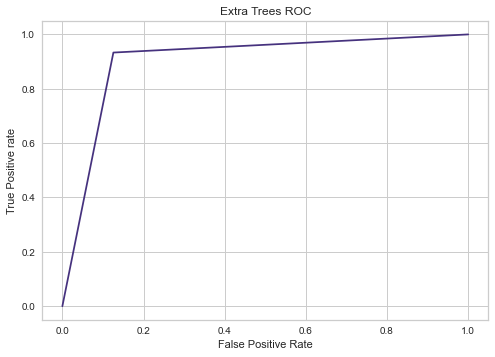

In [45]:
#Getting ROC Graph
X, y = df_splitter(datasets['oversampled-'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
y_pred = best_extra_trees.predict(X_test)
fpr, tpr, thresh = roc_curve(y_test, y_pred, pos_label=1)
plt.plot(fpr, tpr, label='Extra Trees ROC')
plt.title('Extra Trees ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate');

0.9038827935089678

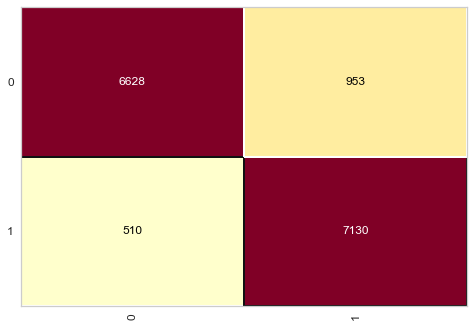

In [46]:
cm = ConfusionMatrix(best_extra_trees)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [47]:
feature_imp = pd.DataFrame(best_extra_trees.feature_importances_, index = X.columns)

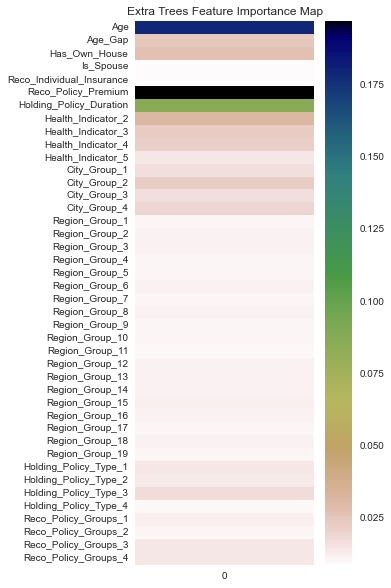

In [48]:
plt.figure(figsize = (4,10))
sns.heatmap(feature_imp, annot=False, cmap='gist_earth_r').set(title='Extra Trees Feature Importance Map');

In [27]:
best_forest = RandomForestClassifier(max_depth=50, n_estimators=1000, n_jobs=-1,
                       oob_score=True)

In [14]:
X, y = df_splitter(datasets['oversampled-'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

0.9812758688653833

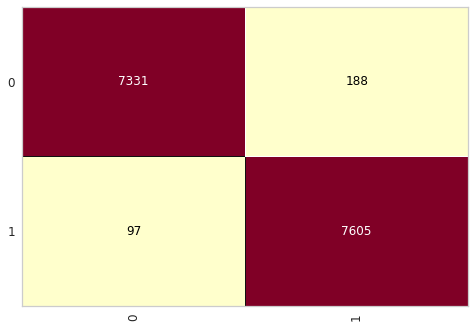

In [15]:
cm = ConfusionMatrix(best_extra_trees)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
# Random forest cross-validation
X, y = df_splitter(datasets['oversampled+'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #No fixed seed for a new train/test split
rand_forest = RandomForestClassifier(criterion='gini',
                                     max_leaf_nodes=None,
                                     bootstrap=True,
                                     oob_score=True,
                                     n_estimators=1000,
                                     n_jobs = -1) #No fixed seed this time, so the model can train new random states
rand_forest_test = cross_val_score(rand_forest,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy') #Only 3 to avoid excessive memory overload of our instance
display_scores(rand_forest_test)

In [21]:
X, y = df_splitter(datasets['oversampled+'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
cm = ConfusionMatrix(best_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

AttributeError: 'list' object has no attribute 'take'

In [19]:
best_forest = RandomForestClassifier(max_depth=50, n_estimators=1000, n_jobs=-1,
                       oob_score=True)

---
# Remove later

In [8]:
#Reset best_extra_trees
X, y = df_splitter(datasets['oversampled-'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)

In [10]:
best_extra_trees = ExtraTreesClassifier(max_depth=50, n_estimators=1000, random_state=1216)

In [11]:
best_extra_trees.fit(X_train, y_train);

In [9]:
#Reset best_forest
X, y = df_splitter(datasets['oversampled-'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)

In [11]:
best_forest = AdaBoostClassifier(n_estimators=600, random_state=1216)

In [ ]:
best_forest.fit(X_train, y_train);

In [13]:
from joblib import load, dump

In [16]:

#dump(best_forest,'s3://trabalho-ifsp-campinas-interdisciplinar-2022-2/random_forest_model.pkl',compress='zlib')

FileNotFoundError: [Errno 2] No such file or directory: 's3://trabalho-ifsp-campinas-interdisciplinar-2022-2/random_forest_model.pkl'